In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import matplotlib.cm

In [2]:
pd.read_excel?

In [3]:
zillow_SDdata = pd.read_excel("san-diego-ca-neighborhoods-Report.xls")

In [4]:
print (zillow_SDdata)

    San Diego, CA - All Homes    Unnamed: 1 Unnamed: 2  \
0                   Statistic           NaN        NaN   
1                 Region Name   Region Type       Type   
2                   San Diego          city  All Homes   
3                 Adams North  neighborhood  All Homes   
4              Allied Gardens  neighborhood  All Homes   
5                  Alta Vista  neighborhood  All Homes   
6       Azalea-Hollywood Park  neighborhood  All Homes   
7                 Balboa Park  neighborhood  All Homes   
8                Barrio Logan  neighborhood  All Homes   
9                      Bay Ho  neighborhood  All Homes   
10                   Bay Park  neighborhood  All Homes   
11               Bay Terraces  neighborhood  All Homes   
12                  Bird Land  neighborhood  All Homes   
13       Black Mountain Ranch  neighborhood  All Homes   
14                 Burlingame  neighborhood  All Homes   
15            Carmel Mountain  neighborhood  All Homes   
16            

In [5]:
zillow_SDdata = pd.read_excel("san-diego-ca-neighborhoods-Report.xls", header =2)

In [6]:
print (zillow_SDdata)

                 Region Name   Region Type       Type  Current  \
0                  San Diego          city  All Homes   564200   
1                Adams North  neighborhood  All Homes   654400   
2             Allied Gardens  neighborhood  All Homes   544500   
3                 Alta Vista  neighborhood  All Homes   423700   
4      Azalea-Hollywood Park  neighborhood  All Homes   394800   
5                Balboa Park  neighborhood  All Homes      ---   
6               Barrio Logan  neighborhood  All Homes      ---   
7                     Bay Ho  neighborhood  All Homes   627400   
8                   Bay Park  neighborhood  All Homes   737200   
9               Bay Terraces  neighborhood  All Homes   427100   
10                 Bird Land  neighborhood  All Homes   539400   
11      Black Mountain Ranch  neighborhood  All Homes  1039800   
12                Burlingame  neighborhood  All Homes      ---   
13           Carmel Mountain  neighborhood  All Homes   689300   
14        

In [7]:
print(zillow_SDdata.columns)

Index([u'Region Name', u'Region Type', u'Type', u'Current',
       u'Month Over Month', u'Quarter Over Quarter', u'Year Over Year',
       u'5 Year Annualized', u'10 Year Annualized', u'Current.1',
       u'Month Over Month.1', u'Quarter Over Quarter.1', u'Year Over Year.1',
       u'Current.2', u'Month Over Month.2', u'Quarter Over Quarter.2',
       u'Year Over Year.2', u'Current.3', u'Month Over Month.3',
       u'Quarter Over Quarter.3', u'Year Over Year.3', u'Current.4',
       u'Month Over Month.4', u'Quarter Over Quarter.4', u'Year Over Year.4',
       u'Current.5', u'Month Over Month.5', u'Quarter Over Quarter.5',
       u'Year Over Year.5', u'Current.6', u'Month Over Month.6',
       u'Quarter Over Quarter.6', u'Year Over Year.6', u'Current.7',
       u'Month Over Month.7', u'Quarter Over Quarter.7', u'Year Over Year.7',
       u'Current.8', u'Month Over Month.8', u'Quarter Over Quarter.8',
       u'Year Over Year.8', u'Current.9', u'Month Over Month.9',
       u'Quarter Over 

In [8]:
zillow_SDdata= zillow_SDdata.drop(zillow_SDdata.index[0])

In [9]:
print(zillow_SDdata)

                 Region Name   Region Type       Type  Current  \
1                Adams North  neighborhood  All Homes   654400   
2             Allied Gardens  neighborhood  All Homes   544500   
3                 Alta Vista  neighborhood  All Homes   423700   
4      Azalea-Hollywood Park  neighborhood  All Homes   394800   
5                Balboa Park  neighborhood  All Homes      ---   
6               Barrio Logan  neighborhood  All Homes      ---   
7                     Bay Ho  neighborhood  All Homes   627400   
8                   Bay Park  neighborhood  All Homes   737200   
9               Bay Terraces  neighborhood  All Homes   427100   
10                 Bird Land  neighborhood  All Homes   539400   
11      Black Mountain Ranch  neighborhood  All Homes  1039800   
12                Burlingame  neighborhood  All Homes      ---   
13           Carmel Mountain  neighborhood  All Homes   689300   
14             Carmel Valley  neighborhood  All Homes   958700   
15        

In [10]:
zillow_SDdata = zillow_SDdata.drop("Region Type", axis =1)

In [11]:
zillow_SDdata = zillow_SDdata.drop("Type", axis =1)

In [12]:
zillow_SDdata = zillow_SDdata[zillow_SDdata.keys()[:7]]

In [13]:
print (zillow_SDdata)

                 Region Name  Current Month Over Month Quarter Over Quarter  \
1                Adams North   654400       0.00800986            0.0109686   
2             Allied Gardens   544500       0.00777346            0.0126465   
3                 Alta Vista   423700       0.00284024            0.0114586   
4      Azalea-Hollywood Park   394800         0.010494             0.025721   
5                Balboa Park      ---              ---                  ---   
6               Barrio Logan      ---              ---                  ---   
7                     Bay Ho   627400        0.0132429            0.0218241   
8                   Bay Park   737200        0.0243157            0.0522409   
9               Bay Terraces   427100       0.00494118            0.0188454   
10                 Bird Land   539400       0.00334821            0.0148636   
11      Black Mountain Ranch  1039800        0.0194118             0.046287   
12                Burlingame      ---              -

In [14]:
zillow_SDdata = zillow_SDdata.drop(["Month Over Month","Quarter Over Quarter", "Year Over Year", "10 Year Annualized"], axis = 1)

In [15]:
print (zillow_SDdata)

                 Region Name  Current 5 Year Annualized
1                Adams North   654400            0.1057
2             Allied Gardens   544500            0.0844
3                 Alta Vista   423700            0.1034
4      Azalea-Hollywood Park   394800            0.1451
5                Balboa Park      ---               ---
6               Barrio Logan      ---               ---
7                     Bay Ho   627400            0.0961
8                   Bay Park   737200            0.0877
9               Bay Terraces   427100            0.1041
10                 Bird Land   539400            0.0831
11      Black Mountain Ranch  1039800            0.0703
12                Burlingame      ---               ---
13           Carmel Mountain   689300            0.0732
14             Carmel Valley   958700            0.0656
15                    Castle   363400            0.1537
16            Cherokee Point   419100               ---
17             Chollas Creek   411900           

In [16]:
zillow_SDdata = zillow_SDdata.replace("---", np.nan)

In [17]:
print(zillow_SDdata)

                 Region Name    Current  5 Year Annualized
1                Adams North   654400.0             0.1057
2             Allied Gardens   544500.0             0.0844
3                 Alta Vista   423700.0             0.1034
4      Azalea-Hollywood Park   394800.0             0.1451
5                Balboa Park        NaN                NaN
6               Barrio Logan        NaN                NaN
7                     Bay Ho   627400.0             0.0961
8                   Bay Park   737200.0             0.0877
9               Bay Terraces   427100.0             0.1041
10                 Bird Land   539400.0             0.0831
11      Black Mountain Ranch  1039800.0             0.0703
12                Burlingame        NaN                NaN
13           Carmel Mountain   689300.0             0.0732
14             Carmel Valley   958700.0             0.0656
15                    Castle   363400.0             0.1537
16            Cherokee Point   419100.0                N

In [18]:
zillow_SDdata = zillow_SDdata.dropna()
print(zillow_SDdata)

                 Region Name    Current  5 Year Annualized
1                Adams North   654400.0             0.1057
2             Allied Gardens   544500.0             0.0844
3                 Alta Vista   423700.0             0.1034
4      Azalea-Hollywood Park   394800.0             0.1451
7                     Bay Ho   627400.0             0.0961
8                   Bay Park   737200.0             0.0877
9               Bay Terraces   427100.0             0.1041
10                 Bird Land   539400.0             0.0831
11      Black Mountain Ranch  1039800.0             0.0703
13           Carmel Mountain   689300.0             0.0732
14             Carmel Valley   958700.0             0.0656
15                    Castle   363400.0             0.1537
17             Chollas Creek   411900.0             0.1147
18              Chollas View   397200.0             0.1344
19      Clairemont Mesa East   549700.0             0.0858
20      Clairemont Mesa West   583600.0             0.08

In [19]:
zillow_SDdata['5 Year Annualized'].values

array([ 0.1057,  0.0844,  0.1034,  0.1451,  0.0961,  0.0877,  0.1041,
        0.0831,  0.0703,  0.0732,  0.0656,  0.1537,  0.1147,  0.1344,
        0.0858,  0.0802,  0.146 ,  0.0938,  0.0687,  0.0813,  0.1023,
        0.0688,  0.0832,  0.0809,  0.1061,  0.1141,  0.1099,  0.1098,
        0.1156,  0.1593,  0.1139,  0.1427,  0.1248,  0.0759,  0.1071,
        0.0925,  0.0737,  0.0581,  0.0805,  0.1172,  0.0916,  0.1174,
        0.1449,  0.0766,  0.0874,  0.0702,  0.0895,  0.0887,  0.0601,
        0.0692,  0.0879,  0.0843,  0.0802,  0.0687,  0.1373,  0.1374,
        0.1146,  0.1238,  0.0672,  0.0917,  0.0932,  0.1234,  0.0846,
        0.0895,  0.089 ,  0.113 ,  0.0722,  0.112 ,  0.1105,  0.0711,
        0.0769,  0.082 ,  0.0836,  0.0712,  0.1361,  0.1166,  0.0975,
        0.1117,  0.0814,  0.0819,  0.0774,  0.1087,  0.0658,  0.0845,
        0.1036,  0.0578,  0.0797,  0.0991,  0.1418,  0.097 ,  0.069 ,
        0.0626,  0.0752,  0.0884,  0.1121,  0.0915])

In [20]:
columns = ["neighborhood", "2017", "2016", "2015", "2014", "2013"]
propertyValue_SD = pd.DataFrame(columns = columns)
print (propertyValue_SD)

for index, row in zillow_SDdata.iterrows():
    neighborhood = row["Region Name"]
    x_2017 = row["Current"]
    x_2016 = x_2017 * (1 - row["5 Year Annualized"]) 
    x_2015 = x_2016 * (1 - row["5 Year Annualized"]) 
    x_2014 = x_2015 * (1 - row["5 Year Annualized"]) 
    x_2013 = x_2014 * (1 - row["5 Year Annualized"])
    add_propertyValue_SD = pd.DataFrame([[neighborhood, x_2017, x_2016, x_2015, x_2014, x_2013]], columns = columns) 
    print (add_propertyValue_SD)
    propertyValue_SD = propertyValue_SD.append(add_propertyValue_SD)
print(propertyValue_SD)

Empty DataFrame
Columns: [neighborhood, 2017, 2016, 2015, 2014, 2013]
Index: []
  neighborhood      2017       2016           2015           2014  \
0  Adams North  654400.0  585229.92  523371.117456  468050.790341   

            2013  
0  418577.821802  
     neighborhood      2017      2016          2015           2014  \
0  Allied Gardens  544500.0  498544.2  456467.06952  417941.248853   

            2013  
0  382667.007449  
  neighborhood      2017       2016           2015           2014  \
0   Alta Vista  423700.0  379889.42  340608.853972  305389.898471   

            2013  
0  273812.582969  
            neighborhood      2017       2016           2015           2014  \
0  Azalea-Hollywood Park  394800.0  337514.52  288541.163148  246673.840375   

            2013  
0  210881.466137  
  neighborhood      2017       2016           2015           2014  \
0       Bay Ho  627400.0  567106.86  512607.890754  463346.272453   

           2013  
0  418818.69567  
  neighborhood 

In [22]:
columns = ["neighborhood", "Change", "2017", "2016", "2015", "2014", "2013"]
propertyValue_SD = pd.DataFrame(columns = columns)
print (propertyValue_SD)

for index, row in zillow_SDdata.iterrows():
    neighborhood = row["Region Name"]
    change = row['5 Year Annualized']
    x_2017 = row["Current"]
    x_2016 = x_2017 * (1 - row["5 Year Annualized"]) 
    x_2015 = x_2016 * (1 - row["5 Year Annualized"]) 
    x_2014 = x_2015 * (1 - row["5 Year Annualized"]) 
    x_2013 = x_2014 * (1 - row["5 Year Annualized"])
    add_propertyValue_SD = pd.DataFrame([[neighborhood, change, x_2017, x_2016, x_2015, x_2014, x_2013]], columns = columns) 
    print (add_propertyValue_SD)
    propertyValue_SD = propertyValue_SD.append(add_propertyValue_SD)
print(propertyValue_SD)

Empty DataFrame
Columns: [neighborhood, Change, 2017, 2016, 2015, 2014, 2013]
Index: []
  neighborhood  Change      2017       2016           2015           2014  \
0  Adams North  0.1057  654400.0  585229.92  523371.117456  468050.790341   

            2013  
0  418577.821802  
     neighborhood  Change      2017      2016          2015           2014  \
0  Allied Gardens  0.0844  544500.0  498544.2  456467.06952  417941.248853   

            2013  
0  382667.007449  
  neighborhood  Change      2017       2016           2015           2014  \
0   Alta Vista  0.1034  423700.0  379889.42  340608.853972  305389.898471   

            2013  
0  273812.582969  
            neighborhood  Change      2017       2016           2015  \
0  Azalea-Hollywood Park  0.1451  394800.0  337514.52  288541.163148   

            2014           2013  
0  246673.840375  210881.466137  
  neighborhood  Change      2017       2016           2015           2014  \
0       Bay Ho  0.0961  627400.0  567106.

# Spoke to Brad
We will be using the 5 year annualized percentage rather than the 10 year annualized because the 10 year includes the 2008 Property Value/ Housing crash.


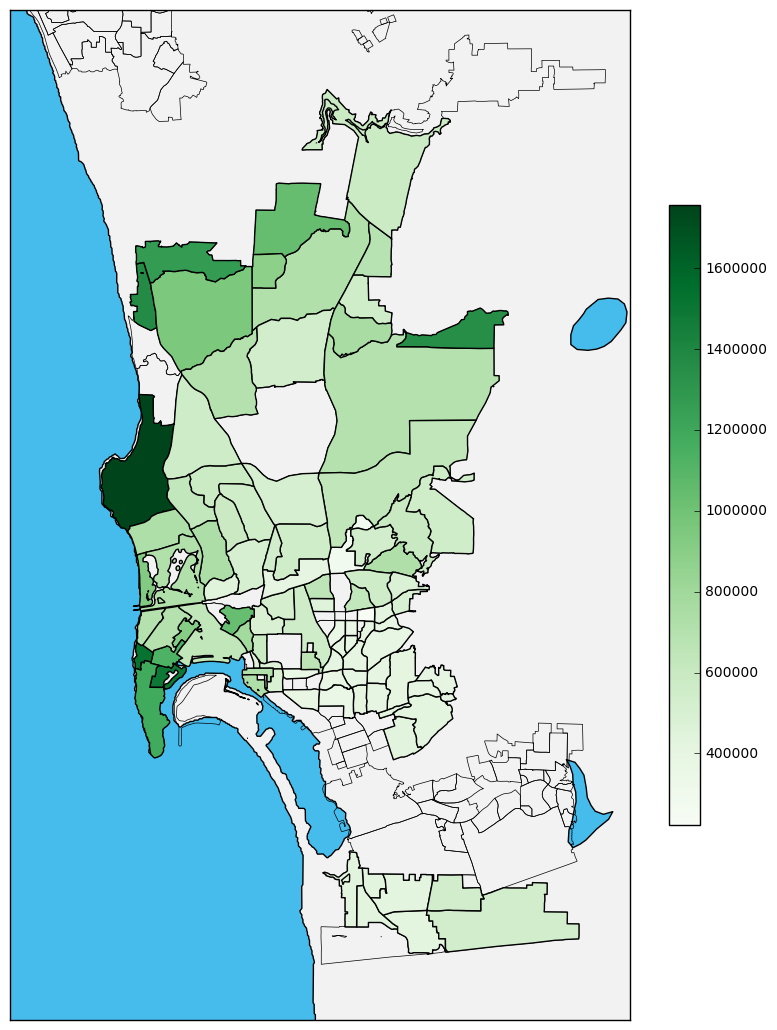

In [24]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2017'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2017'])
plt.colorbar(mapper, shrink=0.4)

m

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2016'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2016'])
plt.colorbar(mapper, shrink=0.4)

m

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

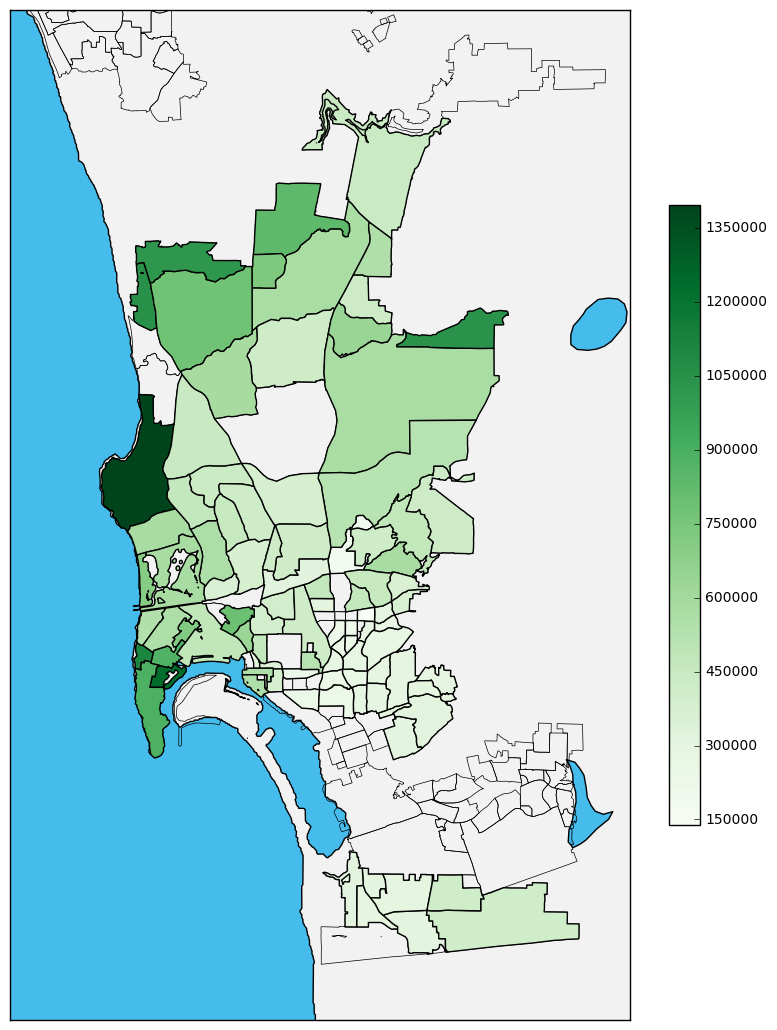

In [25]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2014'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2014'])
plt.colorbar(mapper, shrink=0.4)

m

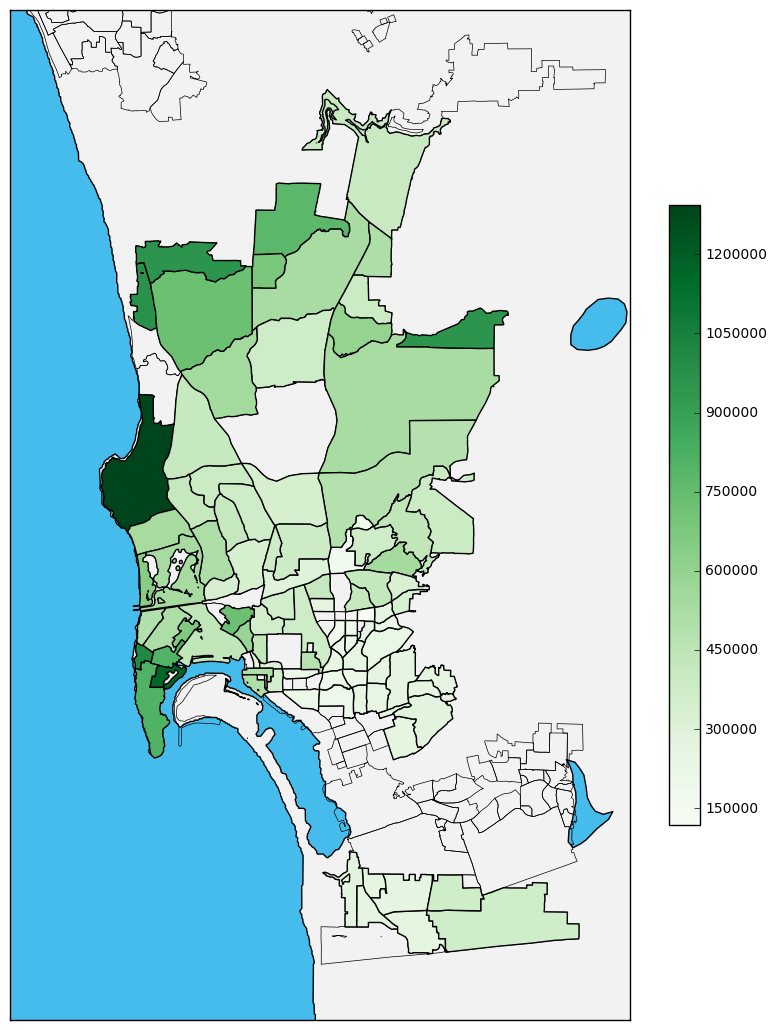

In [26]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2013'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2013'])
plt.colorbar(mapper, shrink=0.4)

m

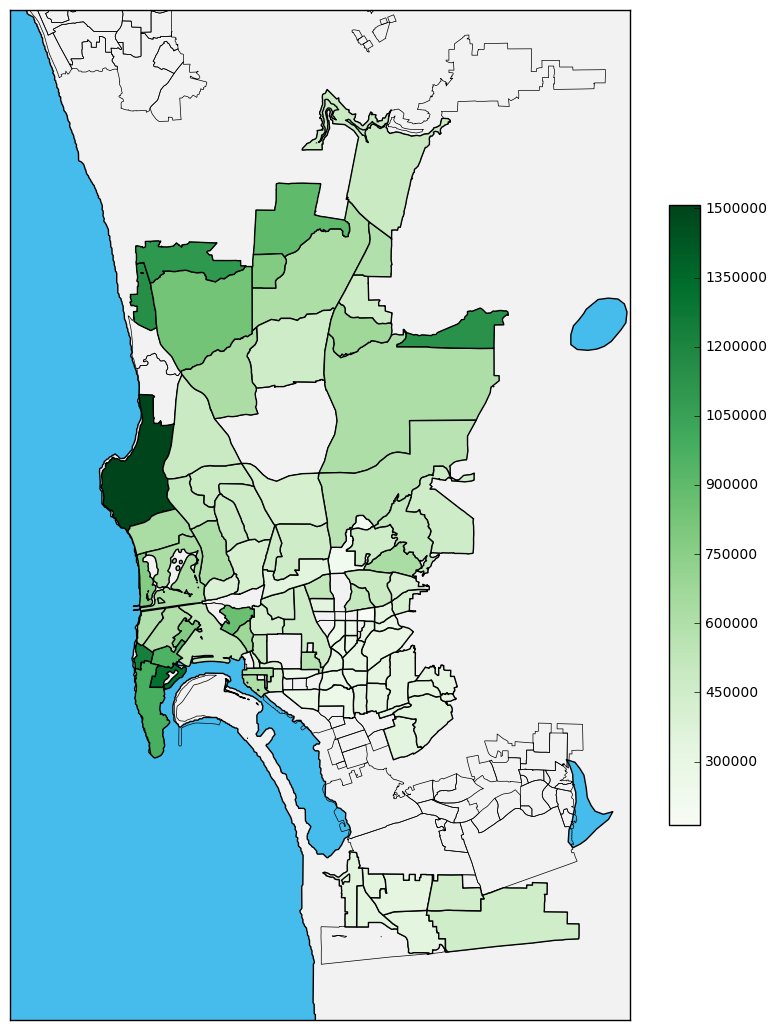

In [27]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2015'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2015'])
plt.colorbar(mapper, shrink=0.4)

m

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['2012'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['2012'])
plt.colorbar(mapper, shrink=0.4)

m

KeyError: 'change'

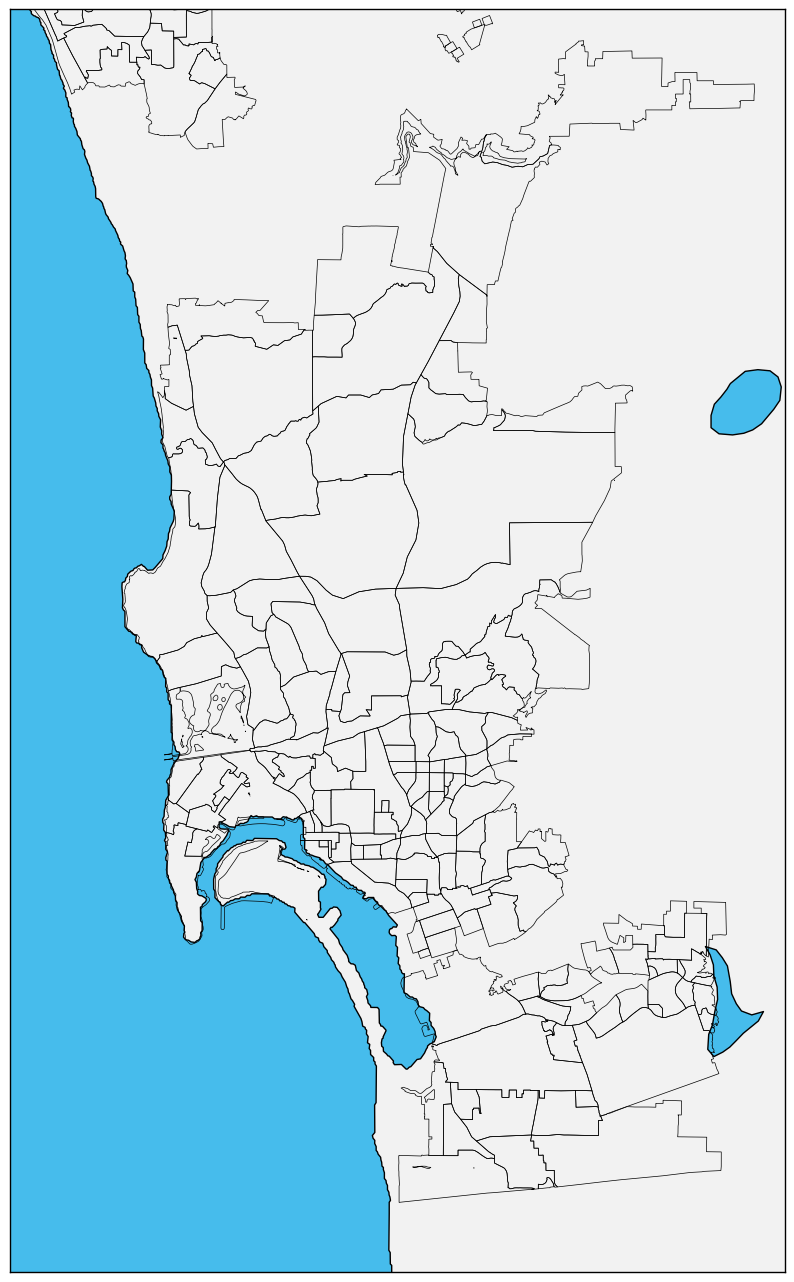

In [28]:
fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.7157, lon_0=117.1611,
            llcrnrlon=-117.35, llcrnrlat= 32.5, urcrnrlon=-116.89, urcrnrlat=33.13) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile("ZillowNeighborhoods-CA", "neighborhoods")

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')
df_poly = df_poly.dropna()
df_poly = df_poly.drop_duplicates()
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['change'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['change'])
plt.colorbar(mapper, shrink=0.4)

m

In [ ]:
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.neighborhoods],
        'neighborhood': [neighborhoods['Name'] for neighborhoods in m.neighborhoods_info]
    })

In [ ]:
df_poly = df_poly.merge(propertyValue_SD, on= "neighborhood", how='left')

In [ ]:
df_poly = df_poly.dropna()

In [ ]:
df_poly = df_poly.drop_duplicates()